In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline


In [3]:
# import the heart disease dataset
df = pd.read_csv("C:\\Users\\Asus\\Downloads\\Heart-Disease-Predictor-using-Artificial-Neural-Networks-main\\heart.csv")
df.shape

(303, 14)

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = df.copy()
X = data.iloc[:,0:13]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 10 best features

       Specs       Score
7    thalach  188.320472
9    oldpeak   72.644253
11        ca   66.440765
2         cp   62.598098
8      exang   38.914377
4       chol   23.936394
0        age   23.286624
3   trestbps   14.823925
10     slope    9.804095
1        sex    7.576835
12      thal    5.791853
6    restecg    2.978271


[0.07225728 0.05547914 0.12857265 0.06250223 0.05883996 0.01995229
 0.03587602 0.0872871  0.10140345 0.09279397 0.06793598 0.12266348
 0.09443645]


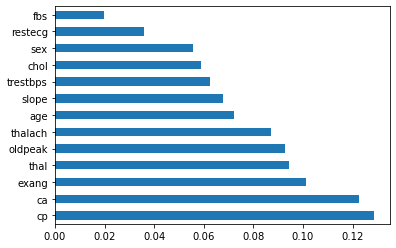

In [7]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

In [8]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [9]:
df.target.describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

<AxesSubplot:>

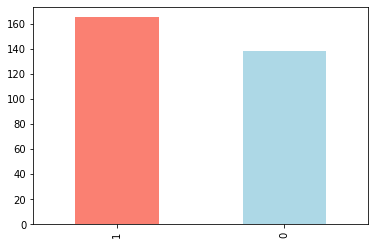

In [10]:
df.target.value_counts().plot(kind="bar",color=["salmon","lightblue"])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Frekuensi penyakit jantung menurut jenis kelamin

In [14]:
df.sex.value_counts() # 1=male, 0=female


1    207
0     96
Name: sex, dtype: int64

In [15]:
# Compare target column to sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


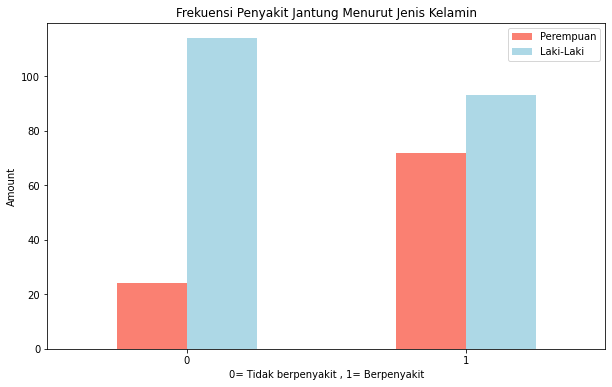

In [16]:
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color = ["salmon","lightblue"])

plt.title("Frekuensi Penyakit Jantung Menurut Jenis Kelamin")
plt.xlabel("0= Tidak berpenyakit , 1= Berpenyakit")
plt.ylabel("Amount")
plt.legend(["Perempuan", "Laki-Laki"])

plt.xticks(rotation=0);

In [17]:
# Age vs max heart rate 
df.thalach.value_counts() # thalach=maximum heartrate achieved

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

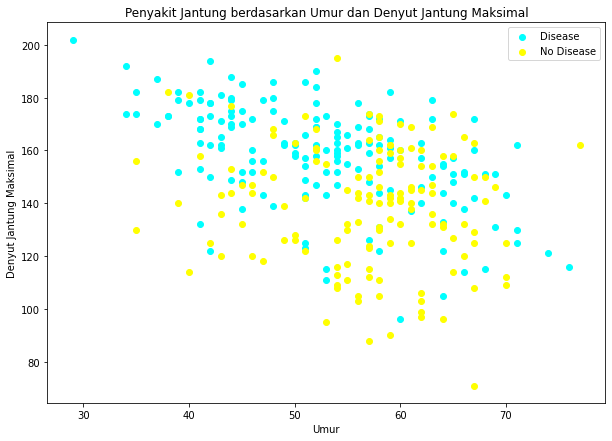

In [18]:
plt.figure(figsize=(10,7))

# Scatter with positive examples
plt.scatter([df.age[df.target==1]], [df.thalach[df.target==1]], c ="aqua")
#Scatter with negative examples
plt.scatter([df.age[df.target==0]], [df.thalach[df.target==0]], c = "yellow")

plt.title("Penyakit Jantung berdasarkan Umur dan Denyut Jantung Maksimal")
plt.xlabel("Umur")
plt.ylabel("Denyut Jantung Maksimal")
plt.legend(["Disease", "No Disease"]);

<AxesSubplot:ylabel='Frequency'>

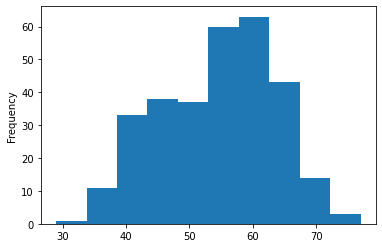

In [19]:
df.age.plot.hist()

In [20]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


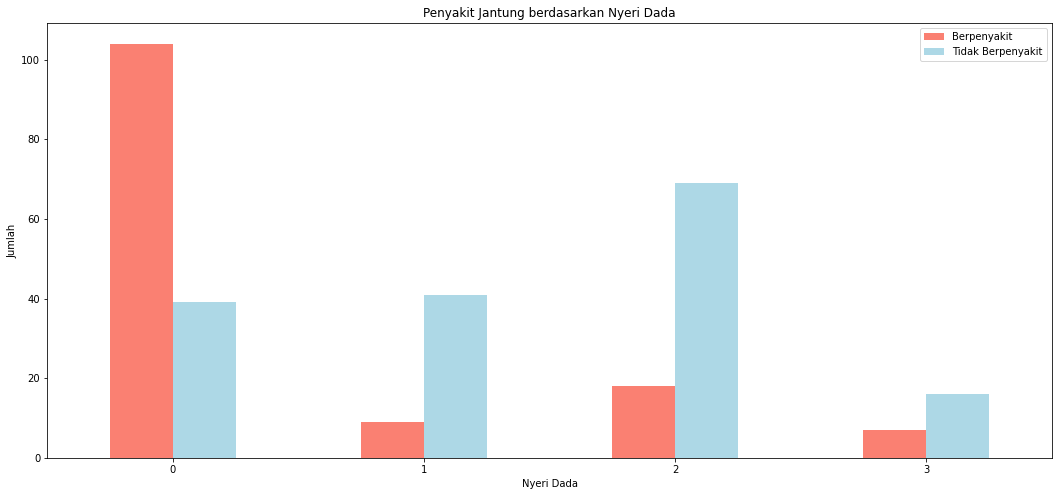

In [21]:
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                 figsize=(18,8),
                                 color=["salmon","lightblue"])
plt.title("Penyakit Jantung berdasarkan Nyeri Dada")
plt.xlabel("Nyeri Dada")
plt.ylabel("Jumlah")
plt.legend(["Berpenyakit", "Tidak Berpenyakit"])
plt.xticks(rotation=0);

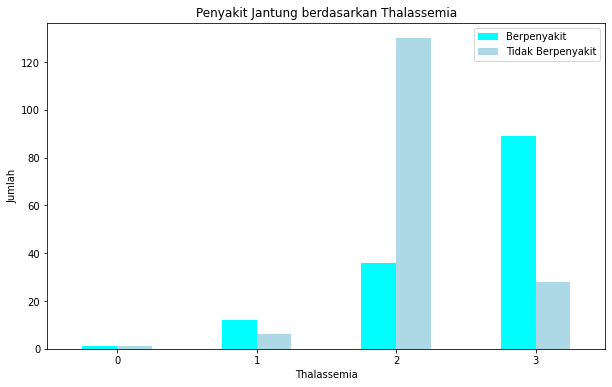

In [22]:
pd.crosstab(df.thal,df.target).plot(kind="bar",
                                 figsize=(10,6),
                                 color=["aqua", "lightblue"])


plt.title("Penyakit Jantung berdasarkan Thalassemia")
plt.xlabel("Thalassemia")
plt.ylabel("Jumlah")
plt.legend(["Berpenyakit", "Tidak Berpenyakit"])
plt.xticks(rotation=0);

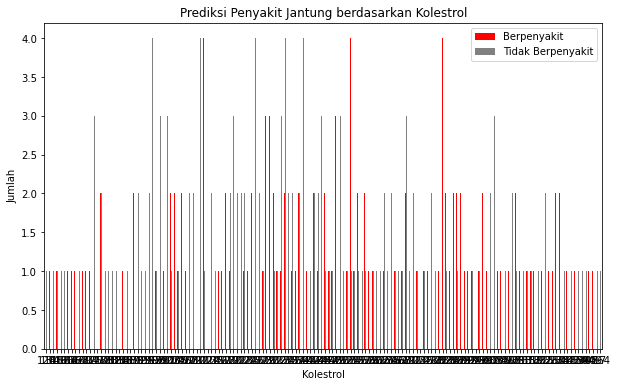

In [23]:
pd.crosstab(df.chol,df.target).plot(kind="bar",
                                 figsize=(10,6),
                                 color=["red", "grey"])


plt.title("Prediksi Penyakit Jantung berdasarkan Kolestrol")
plt.xlabel("Kolestrol")
plt.ylabel("Jumlah")
plt.legend(["Berpenyakit", "Tidak Berpenyakit"])
plt.xticks(rotation=0);

In [24]:
# Make a corealation matrix(how independent column interarct with each other)
df.corr()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


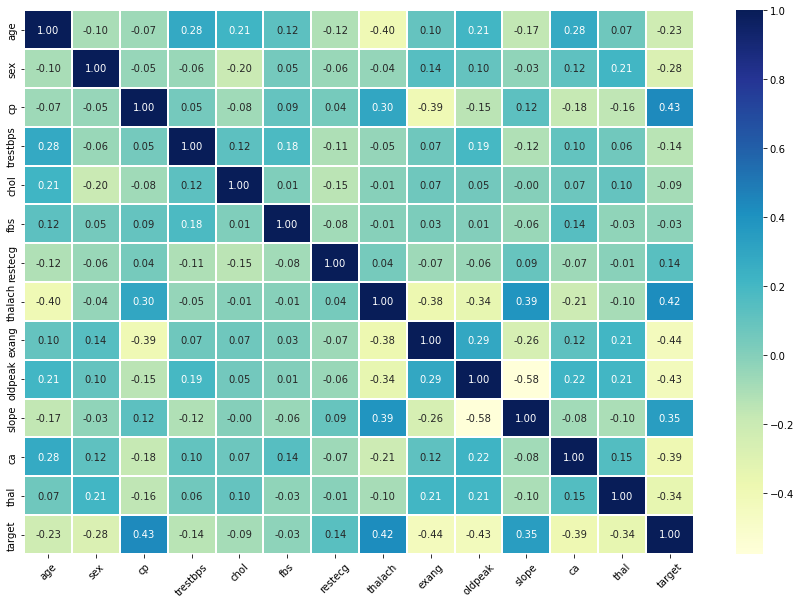

In [25]:
try:
    heat_map = plt.subplots(figsize=(15,10))
    heat_map = sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.2f', linewidths=2, cmap = "YlGnBu")
    heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=45)
except ValueError:  
    pass
plt.show()

In [26]:
for i in df.columns:
    print(i,len(df[i].unique()))

age 41
sex 2
cp 4
trestbps 49
chol 152
fbs 2
restecg 3
thalach 91
exang 2
oldpeak 40
slope 3
ca 5
thal 4
target 2


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
import seaborn as sns

# Modelling

# 1. Mengumpulkan Kolom dan Memisahkan Data

In [28]:
# Create X and y
X = df.drop("target", axis=1)
y= df["target"]
# Split fata into train and ttest
np.random.seed(42)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2)

In [29]:
X_train.shape

(242, 13)

In [30]:
X_test.shape

(61, 13)

In [31]:
y_train.shape

(242,)

In [32]:
y_test.shape

(61,)

In [33]:
from tensorflow.keras.models import load_model

In [34]:
# model training
model = keras.Sequential([
    keras.layers.Dense(13, activation='relu'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_history=model.fit(X_train, y_train, epochs=300, use_multiprocessing=True)

Epoch 1/300
8/8 [==============================] - 1s 4ms/step - loss: 45.1211 - accuracy: 0.5455
Epoch 2/300
8/8 [==============================] - 0s 4ms/step - loss: 38.3099 - accuracy: 0.5496
Epoch 3/300
8/8 [==============================] - 0s 6ms/step - loss: 33.1092 - accuracy: 0.5537
Epoch 4/300
8/8 [==============================] - 0s 4ms/step - loss: 27.9297 - accuracy: 0.5496
Epoch 5/300
8/8 [==============================] - 0s 3ms/step - loss: 21.1222 - accuracy: 0.5496
Epoch 6/300
8/8 [==============================] - 0s 5ms/step - loss: 15.8122 - accuracy: 0.5579
Epoch 7/300
8/8 [==============================] - 0s 3ms/step - loss: 11.3250 - accuracy: 0.5413
Epoch 8/300
8/8 [==============================] - 0s 3ms/step - loss: 6.2807 - accuracy: 0.5124
Epoch 9/300
8/8 [==============================] - 0s 2ms/step - loss: 6.1758 - accuracy: 0.4917
Epoch 10/300
8/8 [==============================] - 0s 4ms/step - loss: 5.2784 - accuracy: 0.5083
Epoch 11/300
8/8 [====

In [35]:
yp = model.predict(X_test)
# print(y_train[:10])
# print(yp[:10])
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

# Results and Metrics

In [36]:
# Model dan Evaluasi

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [38]:
#Laporan klasifikasi model menunjukkan bahwa 81% prediksi tidak adanya 
#penyakit jantung diprediksi benar dan 87% adanya penyakit jantung diprediksi benar.

tf.Tensor(
[[24  5]
 [ 5 27]], shape=(2, 2), dtype=int32)


Text(69.0, 0.5, 'Prediksi Penyakit, 0: Iya/1: Tidak')

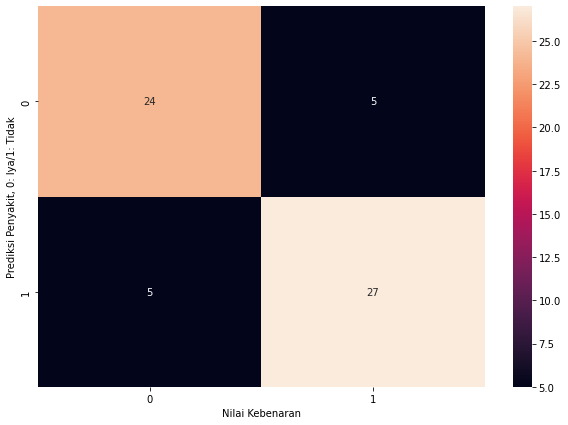

In [40]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

print(cm)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Nilai Kebenaran')
plt.ylabel('Prediksi Penyakit, 0: Iya/1: Tidak')